In [11]:
import pandas as pd

In [12]:
df = pd.read_csv('/content/Lemonade.csv')
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,01/01/2017,Sunday,27.0,2.00,15,0.3,10
1,02/01/2017,Monday,28.9,1.33,15,0.3,13
2,03/01/2017,Tuesday,34.5,1.33,27,0.3,15
3,04/01/2017,Wednesday,44.1,1.05,28,0.3,17
4,05/01/2017,Thursday,42.4,1.00,33,0.3,18


In [7]:
df.shape

(365, 7)

In [8]:
# Regression with certain inputs.
# Forecasting with respect to date and time.

In [9]:
# Relationship between--- 
# 1. sales and temprature
# 2. sales and rainfall
# 3. sales and flyers
# 4. sales and price

In [10]:
# Inferential Statistics
# Correlation test

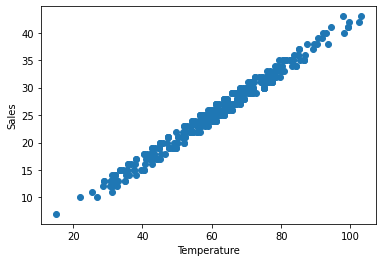

In [13]:
import matplotlib.pyplot as plt
plt.scatter(df['Temperature'],df['Sales'])
plt.xlabel('Temperature')
plt.ylabel('Sales')
plt.show()

In [14]:
df['Temperature'].corr(df['Sales'])

0.9898320849779698

In [15]:
#Correlation (-1 to +1)
#Negative correlation ---> less than 0
#Positive correlation ----> greater than 0

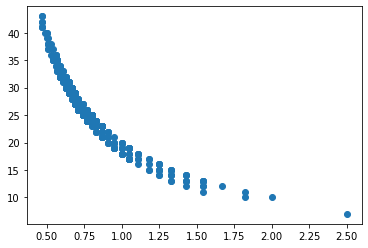

In [16]:
plt.scatter(df['Rainfall'],df['Sales'])
plt.show()

In [17]:
df['Rainfall'].corr(df['Sales'])

-0.909213932410103

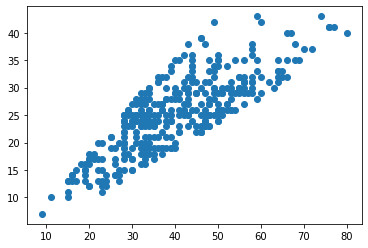

In [18]:
plt.scatter(df['Flyers'],df['Sales'])
plt.show()

In [19]:
df['Flyers'].corr(df['Sales'])

0.8051825759184937

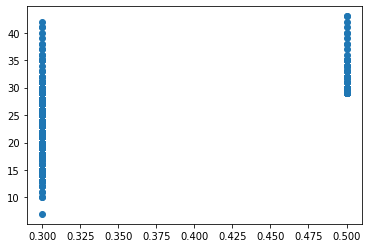

In [20]:
plt.scatter(df['Price'],df['Sales'])
plt.show()

In [21]:
df['Price'].corr(df['Sales'])

0.5129076895636254

In [22]:
df['Price'].value_counts()

0.3    303
0.5     62
Name: Price, dtype: int64

In [23]:
# Do not consider price column as it is a categorical data and has only 2 values
# Consider only 3 values( temprature , rainfall , flyers )

In [24]:
 x = df[['Temperature','Rainfall','Flyers']]
 x

,Temperature,Rainfall,Flyers
0,27.0,2.00,15
1,28.9,1.33,15
2,34.5,1.33,27
3,44.1,1.05,28
4,42.4,1.00,33
...,...,...,...
360,42.7,1.00,33
361,37.8,1.25,32
362,39.5,1.25,17
363,30.9,1.43,22


In [25]:
# Using iloc
x = df.iloc[:,2:5]
x
# we take the 2nd value of ratio one more than required because the last value is neglected

,Temperature,Rainfall,Flyers
0,27.0,2.00,15
1,28.9,1.33,15
2,34.5,1.33,27
3,44.1,1.05,28
4,42.4,1.00,33
...,...,...,...
360,42.7,1.00,33
361,37.8,1.25,32
362,39.5,1.25,17
363,30.9,1.43,22


In [26]:
y = df.iloc[:,6]
y

0      10
1      13
2      15
3      17
4      18
       ..
360    19
361    16
362    15
363    13
364     7
Name: Sales, Length: 365, dtype: int64

In [27]:
# Training data 
# Testing data 
# 75% for training
# 25% for testing 

In [28]:
 from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.33, random_state=42)

In [29]:
print(x_train.shape)
print(x_test.shape)

(244, 3)
(121, 3)


In [30]:
365*0.33

120.45

In [31]:
365*0.67

244.55

In [32]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)

In [33]:
y_pred = reg.predict(x_test)
y_pred

array([32.83547606, 20.90990165, 11.76837935, 21.38974336, 18.85934106,
       34.43286504, 22.52464924, 27.7659493 , 33.2300578 , 29.28206452,
        7.88793431, 18.11558774, 22.0422039 , 17.55790146, 30.20588436,
       23.90993393,  9.49208585, 24.63580391, 20.4272001 , 27.2653956 ,
       18.12579948, 35.19038738, 24.39962305, 28.43576844, 30.22343568,
       34.51354946, 32.07420372, 25.40803772, 14.65073725, 15.56737791,
       14.46747776, 25.39463301, 23.38793962, 17.47721704, 33.01551028,
       27.12454603, 23.19434029, 15.8309887 , 12.37773252, 22.74321528,
       28.66578838, 13.53015742, 17.09340406, 25.63691129, 28.42144239,
       29.22173897, 23.97009908, 20.09953376, 10.01966054, 21.66405942,
       29.20852697, 12.9276826 , 25.8874505 , 28.29136159, 42.33906334,
       13.4665754 , 25.84516869, 18.26625243, 11.60928101, 23.80402659,
       29.36330597, 12.53297275, 24.2973688 , 19.92690261, 26.53293578,
       23.34249714, 28.65143002, 28.59772662, 37.46066037, 23.87

In [34]:
y_test

193    33
33     21
15     12
309    22
57     20
       ..
232    30
18     17
280    24
104    26
282    25
Name: Sales, Length: 121, dtype: int64

In [35]:
# Evaluation
# Loss function : Least
# Accuracy : Highest

In [37]:
import numpy as np
mse1 = np.mean(np.square(np.subtract(y_test,y_pred)))
mse1

0.8641937052436446

In [41]:
#OR
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.8641937052436444

In [42]:
# r2 score
# Coefficient of determination

In [45]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9824577062575081

In [47]:
# Things to explorer 
# Polynomial features (Degree of freedom)
# Regularisation (Advanced) : Rigde , Lasso , ElasticNet

In [ ]:
# Optimiser algorithm using Gradient Descent (Deep Learning)